# Problem Statement :- Given Dataset of Insurance to build A Model to predict Insurance Charges.

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [10]:
cd C:\Users\stayclassy\Desktop\python\Machine Learning\L Rigression\Project

C:\Users\stayclassy\Desktop\python\Machine Learning\L Rigression\Project


In [12]:
df = pd.read_csv("insurance.csv")

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df.shape

(1338, 7)

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [43]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [32]:
df.groupby('region')['region'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

In [37]:
df.groupby('sex')['sex'].count()

sex
female    662
male      676
Name: sex, dtype: int64

In [39]:
df.groupby('smoker')['smoker'].count()

smoker
no     1064
yes     274
Name: smoker, dtype: int64

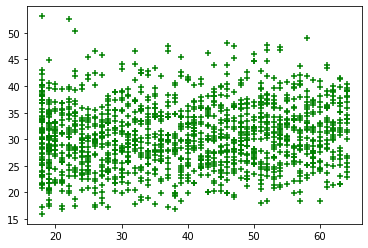

In [12]:
plt.scatter(df.age,df.bmi,color='green',marker='+')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021850714940>,
      dtype=object)

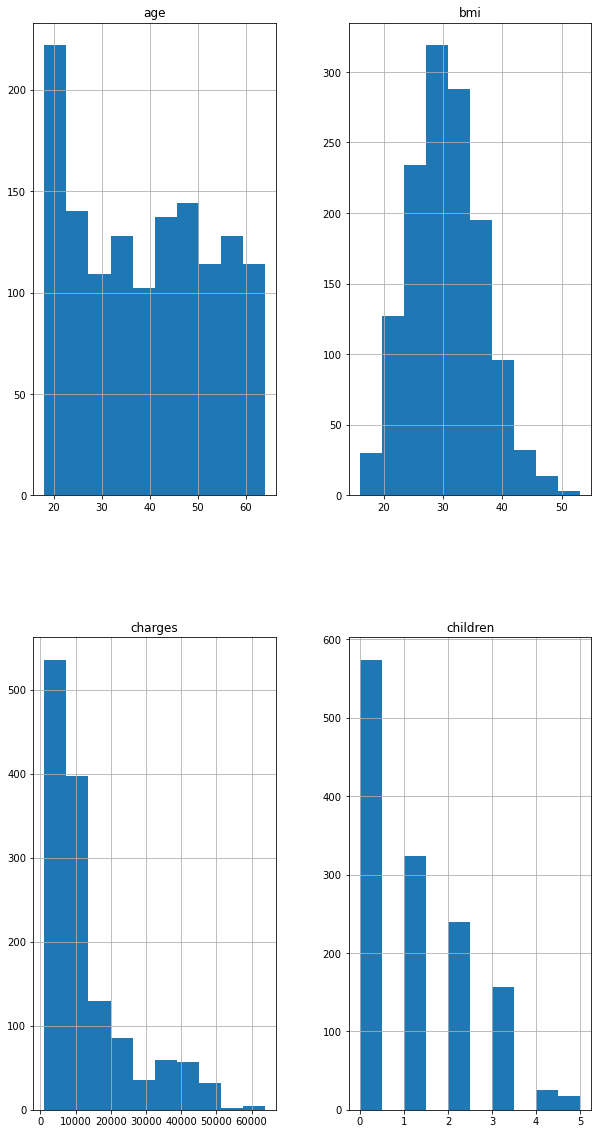

In [41]:
df.hist(figsize=(10,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218508C5430>]],
      dtype=object)

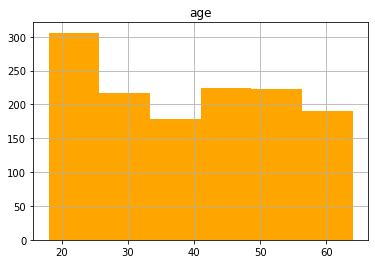

In [42]:
df.hist(column='age',bins=6,color='orange')

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

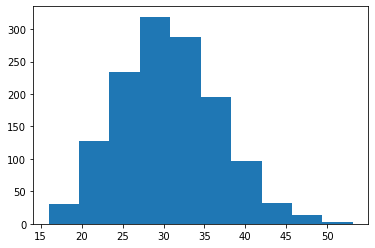

In [23]:
plt.hist(df.bmi)

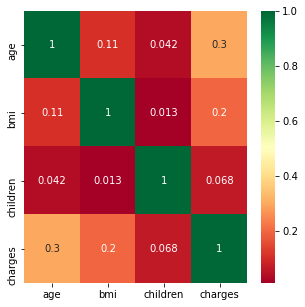

In [28]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [16]:
labelEncoder = LabelEncoder()

In [17]:
df[['age','sex','region']] = df[['age','sex','region']].apply(labelEncoder.fit_transform)

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,yes,3,16884.92400
1,0,1,33.770,1,no,2,1725.55230
2,10,1,33.000,3,no,2,4449.46200
3,15,1,22.705,0,no,1,21984.47061
4,14,1,28.880,0,no,1,3866.85520


In [20]:
x = df.drop('charges',axis=1)

In [22]:
y= df.charges


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [24]:
x

,age,sex,bmi,children,smoker,region
0,1,0,27.900,0,yes,3
1,0,1,33.770,1,no,2
2,10,1,33.000,3,no,2
3,15,1,22.705,0,no,1
4,14,1,28.880,0,no,1
...,...,...,...,...,...,...
1333,32,1,30.970,3,no,1
1334,0,0,31.920,0,no,0
1335,0,0,36.850,0,no,2
1336,3,0,25.800,0,no,3


In [25]:
x_train.shape

(1070, 6)

In [26]:
x_test.shape

(268, 6)

In [27]:
y_train

1204    18223.4512
829      6117.4945
1077     2102.2647
416      9140.9510
1295     1964.7800
           ...    
1242     4296.2712
924      6250.4350
1247     6059.1730
271     42856.8380
474     25382.2970
Name: charges, Length: 1070, dtype: float64

In [28]:
y_train.shape

(1070,)

In [29]:
y_test.shape

(268,)

In [32]:
model = LinearRegression()

In [33]:
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'yes'